# Atividade 03 - A

Utilizando o conjunto de dados Bike Sharing Dataset Data Set: 

1.Explore visualmente e numericamente os dados.

2.Prepare os dados utilizando as técnicas ensinadas na disciplina, quando pertinente.

3.Para cada técnica de preparação de dados aplicada, avalie os algorimos de regressão estudados na disciplina para estimar a variável-alvo cnt (count of total rental bikes including both casual and registered).

4.Utilize gráficos e tabelas para apresentar as métricas obtidas (em treino e em teste), e escolha o melhor modelo com base em uma das métricas apresentadas. Justifique a sua escolha.

5.Envie a URL do jupyter notebook no GitHub.

#### Objetivo

Construir uma aplicação utilizando modelos de regressão para estimar dados referentes a alugueis de bicicletas. 

## Passo 1. Setup do projeto

In [25]:
# Bibliotecas:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns

# Para Git:
import joblib
import os
import urllib

print(f'Seaborn version: {sns.__version__}')
print('Matplot version : {}'.format(mpl.__version__))
print('Numpy version : {}'.format(np.__version__))
print('Pandas version : {}'.format(pd.__version__))
print('Sklearn version : {}'.format(sklearn.__version__))

DAY_ROOT = ('https://archive.ics.uci.edu/ml/machine-learning-databases/00275/')
DAY_URL  = DAY_ROOT + 'Bike-Sharing-Dataset.zip'

DAY_PATH = os.path.join('..', 'data', 'raw')
DAY_FILE = 'day.csv'
DAY_DATA = os.path.join(DAY_PATH, DAY_FILE)


# Biblioteca para treinamento:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Regressão:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor( random_state = 42)


Seaborn version: 0.11.1
Matplot version : 3.2.2
Numpy version : 1.19.5
Pandas version : 1.1.5
Sklearn version : 0.22.2.post1


## Passo 2 . Recuperação de Dados

In [12]:
from zipfile import ZipFile

def download_data(DAY_URL,  DAY_PATH,  DAY_FILE):
       if not os.path.isdir(day_path):
        os.makedirs(day_path)

zip_path = os.path.join(DAY_PATH,'Bike-Sharing-Dataset.zip')

urllib.request.urlretrieve(DAY_URL, zip_path)

download_data(DAY_URL, DAY_PATH)

with ZipFile(zip_path, 'r') as zip:
        zip.extractall(DATA_PATH)

def load_data(day_path, day_file):
    local_path = os.path.join(data_path, day_file)
    return pd.read_csv(local_path)

day_df = load_data(DATA_PATH,DAY_FILE)

AttributeError: ignored

In [13]:
# Download do arquivo: 
day_df = pd.read_csv('day.csv')

## Passo 3. Análise exploratória

In [14]:
# Número de linhas e colunas do dataframe:
print('day_df', day_df.shape)

day_df (731, 16)


In [16]:
# Descrição do arquivo:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
# visualização das primeiras linhas e colunas:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## Passo 4. Preparação inicial dos dados:

In [19]:
# Ajuste das datas na coluna dteday - separação das dos dias, meses e anos:
from datetime import datetime
momento = (day_df['dteday'])
momento = [datetime.strptime(date, '%Y-%m-%d') for date in momento]
#----------------------------------------------------------------
# Criar colunas para cada informação:
ano = []; 
mes = []; 
dia = []

for i in range(len(momento)):
    ano.append(momento[i].year)
    mes.append(momento[i].month)
    dia.append(momento[i].day)

day_df.insert(loc=1, column='ano', value=ano)
day_df.insert(loc=2, column='mes', value=mes)
day_df.insert(loc=3, column='dia', value=dia)
#----------------------------------------------------------------
# Excluindo a coluna dteday, yr e mnth:
day_df.drop('dteday',axis=1,inplace=True)
day_df.drop('yr',axis=1,inplace=True)
day_df.drop('mnth',axis=1,inplace=True)

In [20]:
# Instante e o index são iguai, assim o instant será excluído:
day_df.drop('instant',axis=1,inplace=True)
day_df.head()

,ano,mes,dia,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011,1,2,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011,1,3,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011,1,4,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011,1,5,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


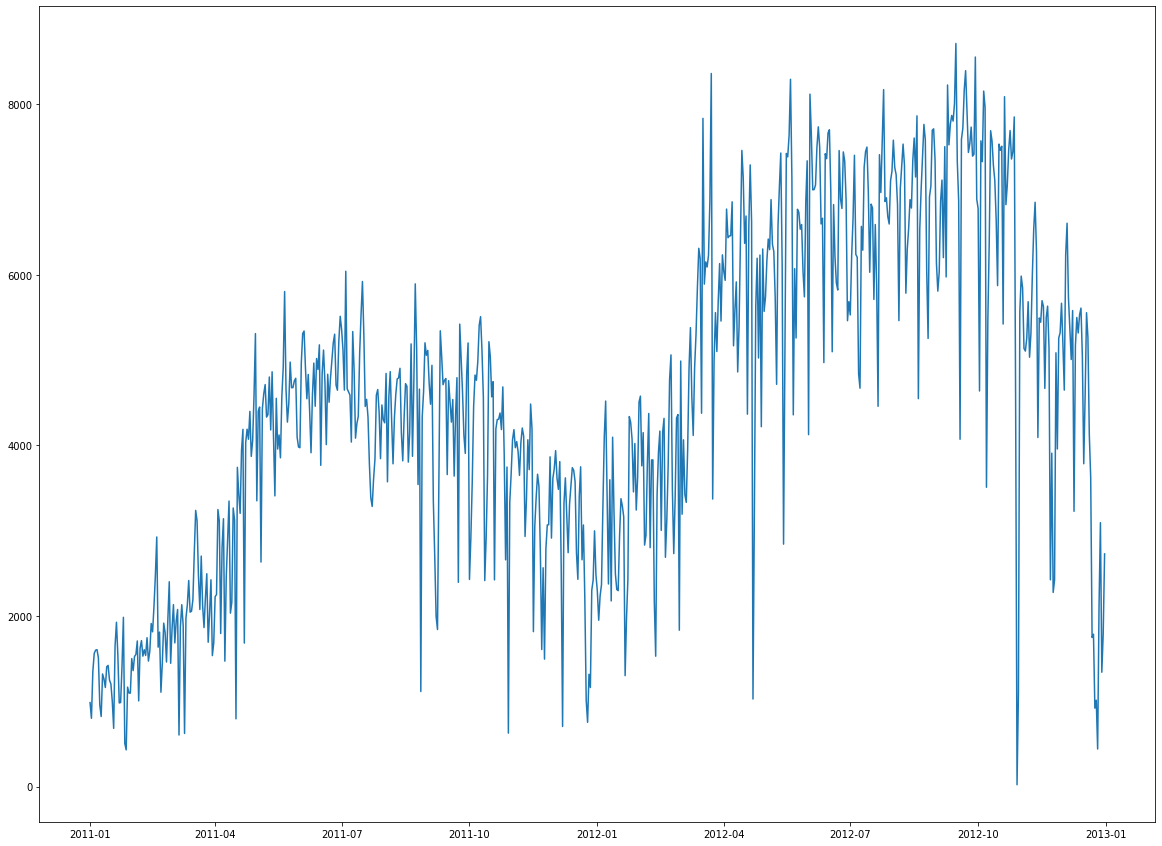

In [21]:
# gráfico inicial
fig, ax= plt.subplots(nrows=1, ncols=1, figsize=(20,15))
_= ax.plot(momento,day_df['cnt'])

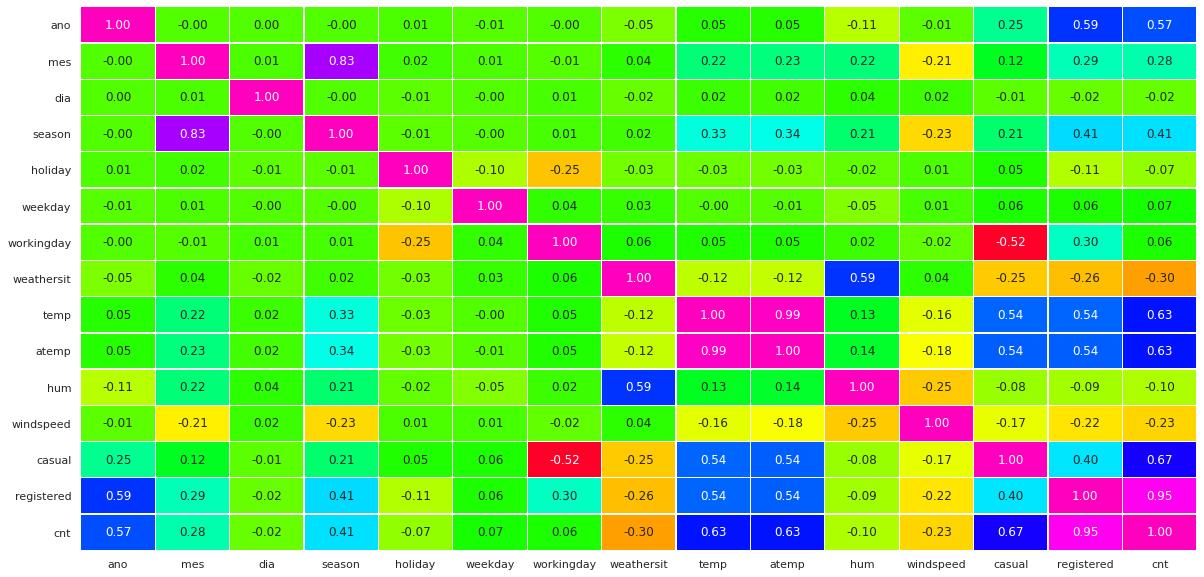

In [26]:
# Criação da matriz de correlação para a vizualização de features:
matriz_de_correlacao = day_df.corr()

#-----------------------------------------------------------
sns.set()
plt.figure(figsize = (20,10))
_=sns.heatmap(matriz_de_correlacao, square=False, annot=True, cbar=False, linewidths=0.3, cmap= 'gist_rainbow', fmt='.2f')

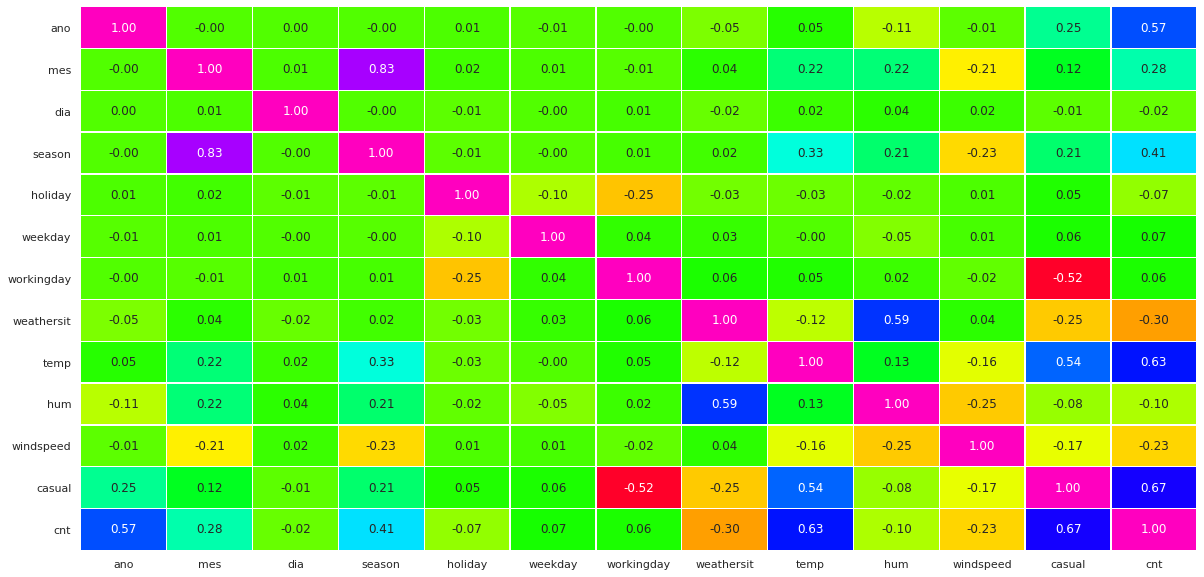

In [27]:
# Podemos observar que temp possui forte correlção com atemp, e registered possui forte correlação com cnt
# assim serão apagadas as colunas atemp e registered
day_df.drop('atemp',axis=1,inplace=True)
day_df.drop('registered',axis=1,inplace=True)

#-------------------------------------------------------------------------
# nova matriz:
matriz_de_correlacao = day_df.corr()
plt.figure(figsize = (20,10))
_=sns.heatmap(matriz_de_correlacao, square=False, annot=True, cbar=False, linewidths=0.3, cmap= 'gist_rainbow', fmt='.2f')

In [28]:
# para determinar o modelo, é possivel ver que a variavel casual é muito maior que as outras
day_df = day_df.drop('casual',axis=1)

## Passo 5. Treinamento e Teste do Modelo

In [29]:
x= day_df.drop('cnt', axis=1).values
y= day_df['cnt'].values

In [30]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = .2, random_state=42)

In [31]:
print('x_train shape :' , x_train.shape)
print('x_test shape :' , x_test.shape)
print('y_train shape :' , y_train.shape)
print('y_test shape :' , y_test.shape)

x_train shape : (584, 11)
x_test shape : (147, 11)
y_train shape : (584,)
y_test shape : (147,)


### Base de comparação:

In [32]:
# ?
#Bibliotecas de medições de erro:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# lista de colunas:
colunas = list(day_df.columns)
#y_hist = x_test[:,colunas.index('?')]

In [33]:
# Regressão:
def build_regressors():
    regressors = []
    regressors.append(
        ('lr',
         LinearRegression(),
         {'fit_intercept': [True, False]}
        )
    )
    
    regressors.append(
        ('svr',
         SVR(),
         {'C': [0.1, 1, 10],
          'gamma': [0.00001, 0.0001, 0.001, 0.01, 1],
          'epsilon': [0.0001, 0.001, 0.01, 1, 10],
          'kernel': ['poly', 'rbf'],
          'degree': [2, 3, 4]}
         )
    )
    
    regressors.append(
        ('dt',
         DecisionTreeRegressor(random_state=42),
         {'max_depth' : [2, 4, 6, 8, 10, 12],
          'splitter' : ['best', 'random']}
        )
    )
    
    regressors.append(
        ('rf',
         RandomForestRegressor(random_state=42),
         {'n_estimators' : [25, 50, 100]}
        )
    )
    return regressors

regressors = build_regressors()

In [34]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

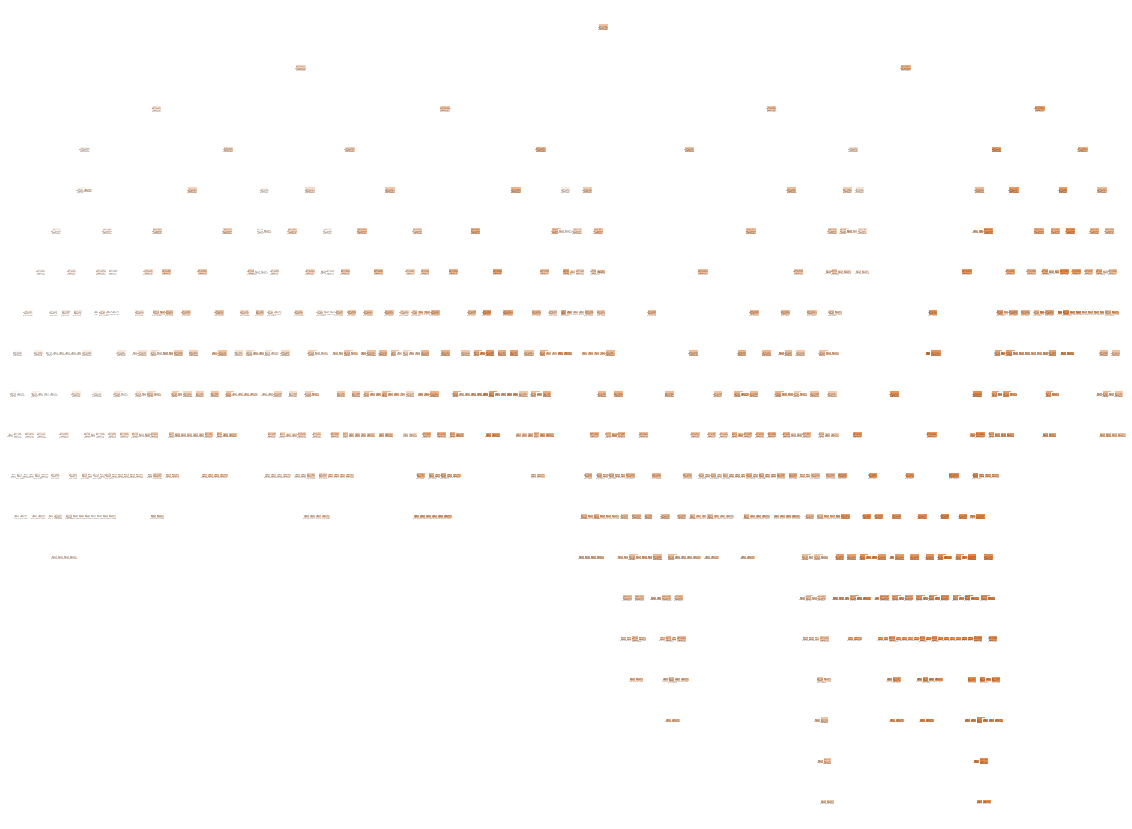

In [35]:
from sklearn.tree import plot_tree
fig2 = plt.figure(figsize = (20,15))
_=plot_tree(rf.estimators_[3], filled = True)

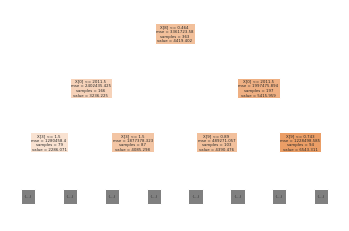

In [36]:
_=plot_tree(rf.estimators_[3], filled = True, max_depth= 2)

## Passo 6. Escolha do Modelo


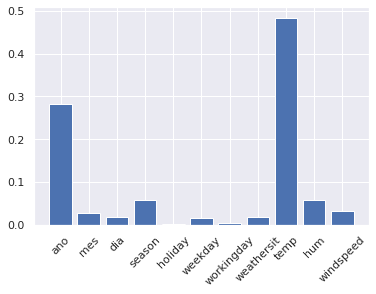

In [37]:
importancias = list(rf.feature_importances_)
variaveis_importancias = [(coluna, importancia) for coluna, importancia in zip(colunas, importancias)]
variaveis_importancias = sorted(variaveis_importancias, key=lambda x:x[1], reverse=True)

X_valores = list(range(len(importancias)))
_ = plt.bar(X_valores, importancias)
_ = plt.xticks(X_valores, colunas[:], rotation=45)



In [ ]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
train_results = []
test_results = []
names = []

scoring = 'neg_root_mean_squared_error'

kfold = KFold(n_splits=5, shuffle=True, random_state= 42)

for name, regressor, params in regressors:
    print(f'regressor: {name}')
    gs = GridSearchCV(regressor, param_grid=params, scoring=scoring)
    gs.fit(x_train, y_train)
    cv_results = cross_val_score(gs, x_train, y_train, cv=kfold, scoring=scoring)
    names.append(name)
    train_results.append(abs(cv_results))
 
    print(f'Mean: {-1 * cv_results.mean():.4f}, Standart Deviation: {cv_results.std():.4f}')
    print(f'Melhor resultado com {gs.best_params_} foi de {-1 * gs.best_score_:.4f}\n')
    
    y_pred = gs.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_results.append(rmse)

regressor: lr
Mean: 906.6891, Standart Deviation: 67.7785
Melhor resultado com {'fit_intercept': True} foi de 894.7815

regressor: svr


In [ ]:
rf_imp = RandomForestRegressor(n_estimators=100, random_state=42)
indices = [colunas.index('ano'), colunas.index('mes'), colunas.index('dia'), colunas.index('temp'), colunas.index('hum')]
x_train_imp = x_train.iloc[:, indices]
x_test_imp = x_test.iloc[:, indices]

rf_imp.fit(x_train_imp, y_train)

y_pred = rf_imp.predict(x_test_imp)
print(f'RMSE:  {mean_squared_error(y_test, y_pred, squared=False)}')